In [37]:
from google.colab import files
uploaded = files.upload("")

Saving sample.jpg to sample (2).jpg


In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

In [39]:
img = cv2.imread("sample (2).jpg",cv2.IMREAD_GRAYSCALE)

(np.float64(-0.5), np.float64(611.5), np.float64(458.5), np.float64(-0.5))

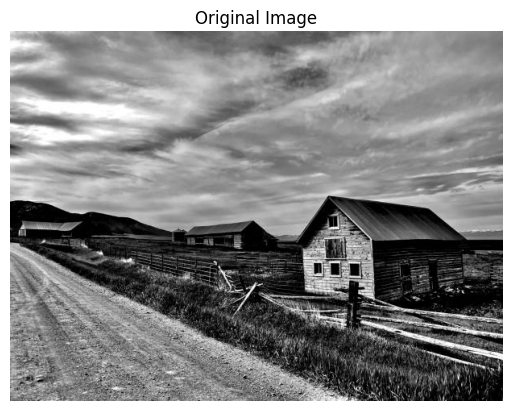

In [40]:
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")

Text(0, 0.5, 'Frequency')

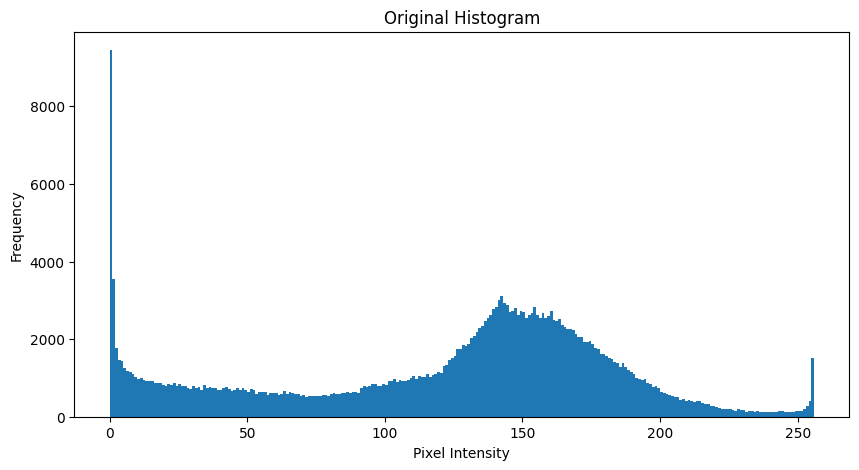

In [41]:
plt.figure(figsize=(10,5))
plt.hist(img.ravel(),bins= 256,range= [0,256])
plt.title("Original Histogram")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

In [42]:
equalized = cv2.equalizeHist(img)

(np.float64(-0.5), np.float64(611.5), np.float64(458.5), np.float64(-0.5))

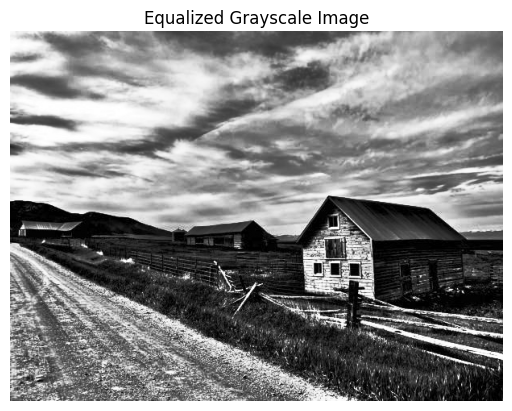

In [43]:
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Grayscale Image")
plt.axis("off")

Text(0, 0.5, 'Frequency')

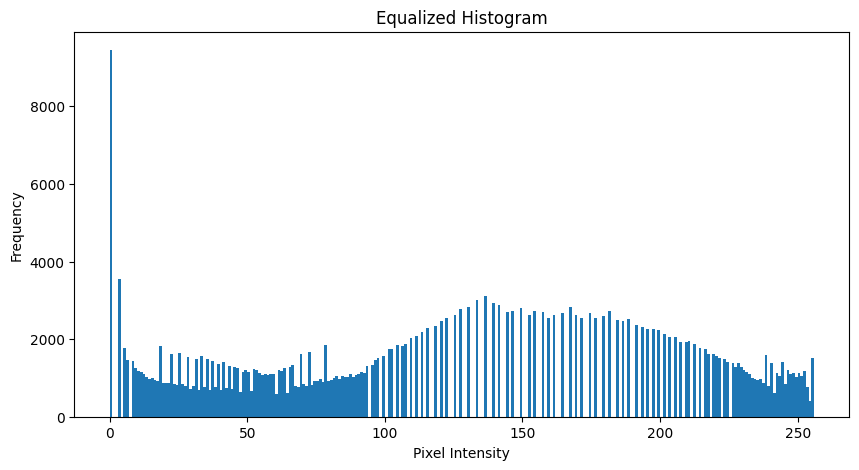

In [44]:
plt.figure(figsize=(10,5))
plt.hist(equalized.ravel(), bins = 256, range=(0,256))
plt.title("Equalized Histogram")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

(np.float64(-0.5), np.float64(611.5), np.float64(458.5), np.float64(-0.5))

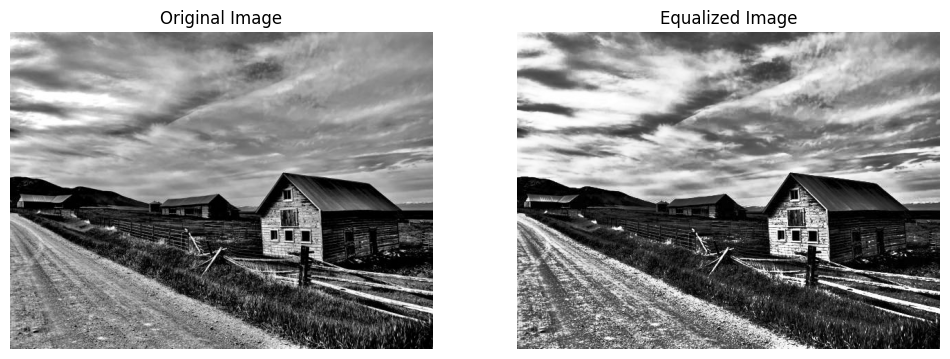

In [45]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

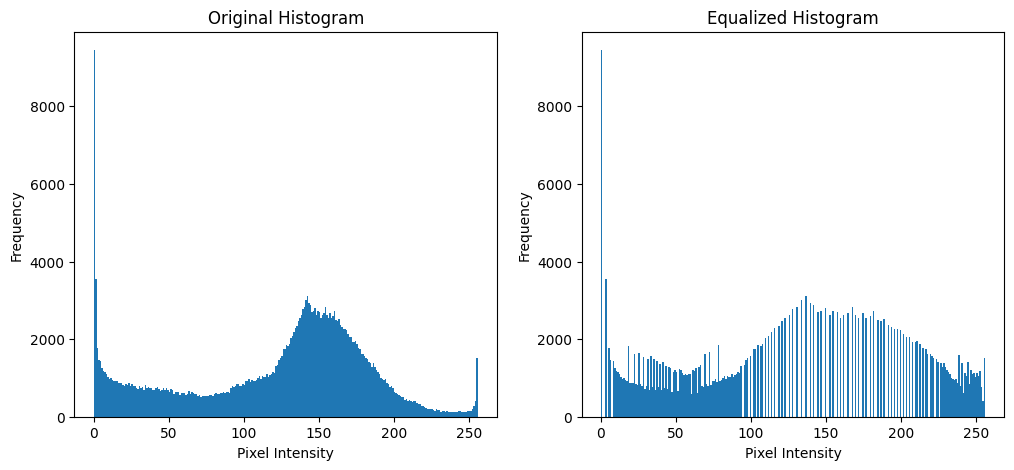

In [46]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(img.ravel(),bins = 256, range=[0, 256])
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(equalized.ravel(),bins = 256,range= [0, 256])
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

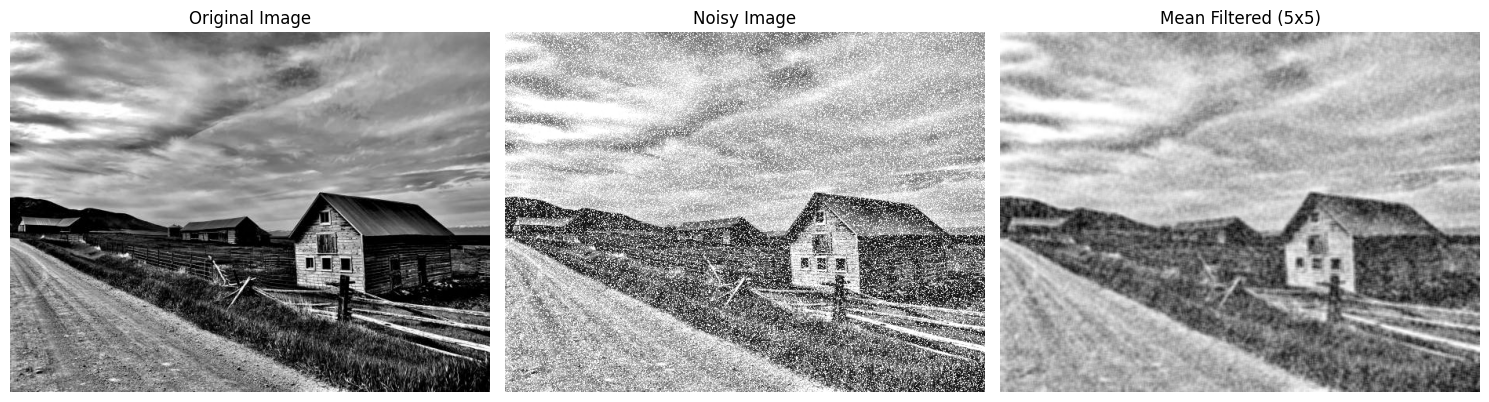

In [47]:
def mean_filter(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

# Add noise for demonstration
noisy_img = img.copy()
noise = np.random.normal(20, 25, img.shape).astype(np.uint8)
noisy_img = cv2.add(img, noise)

# Apply mean filter
mean_filtered = mean_filter(noisy_img,5)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filtered (5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

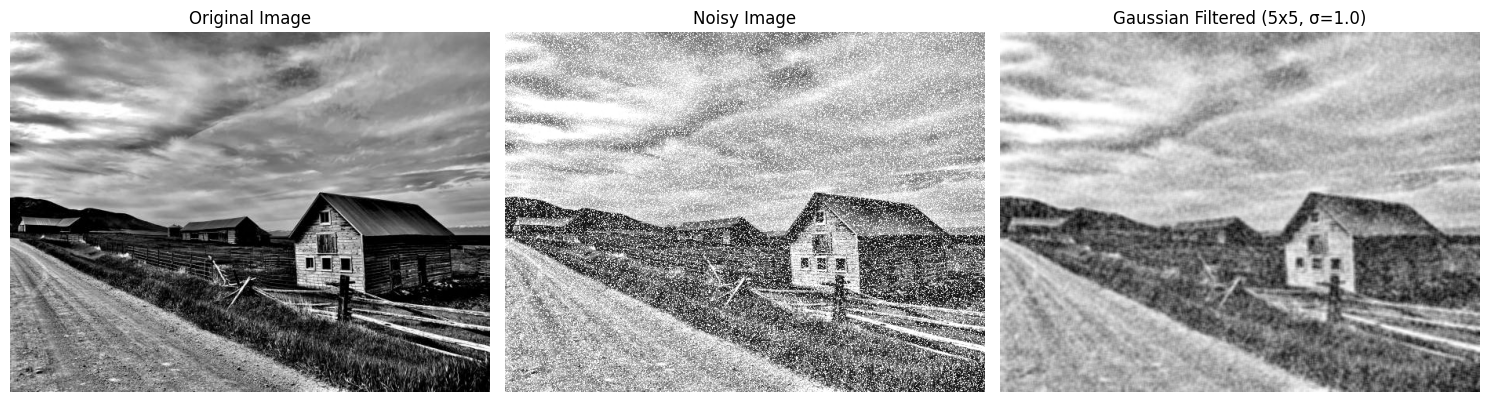

In [48]:
def gaussian_filter(image, kernel_size=5, sigma=1.0):
    filtered_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return filtered_image

gaussian_filtered = gaussian_filter(noisy_img, 5, 5)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered (5x5, σ=1.0)')
plt.axis('off')

plt.tight_layout()
plt.show()

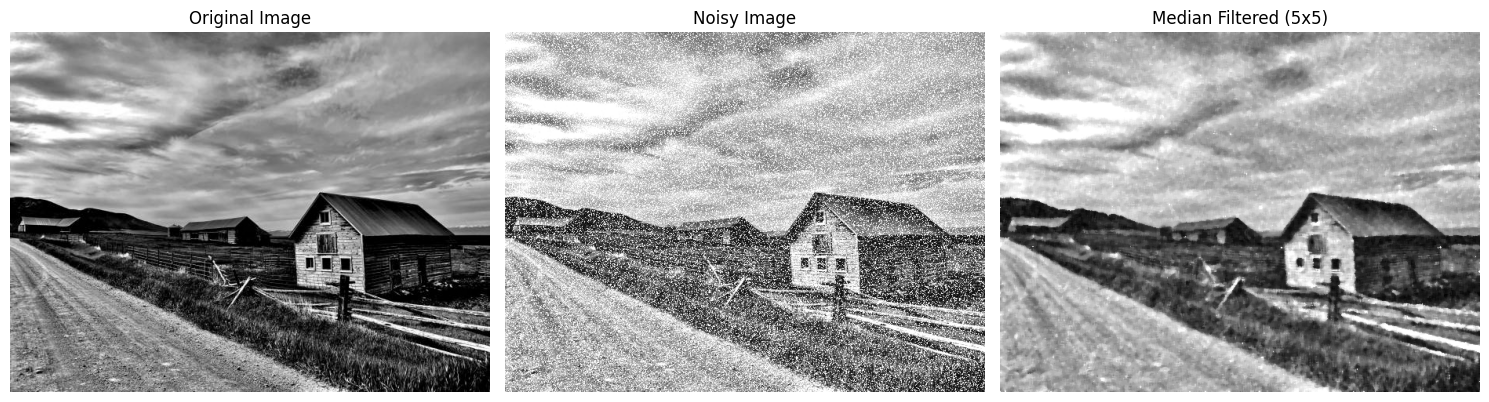

In [49]:
def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

median_filtered = median_filter(noisy_img, 5)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered (5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

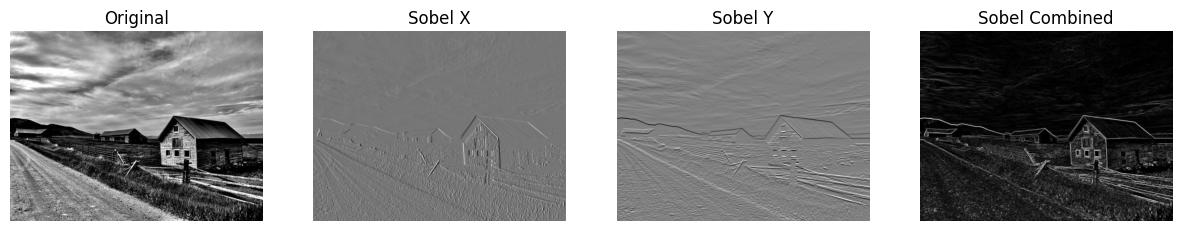

In [50]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges

sobel_combined = cv2.magnitude(sobelx, sobely)

plt.figure(figsize=(15,6))
plt.subplot(1,4,1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(1,4,2), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel X')
plt.axis('off')
plt.subplot(1,4,3), plt.imshow(sobely, cmap='gray'), plt.title('Sobel Y')
plt.axis('off')
plt.subplot(1,4,4), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')
plt.axis('off')
plt.show()

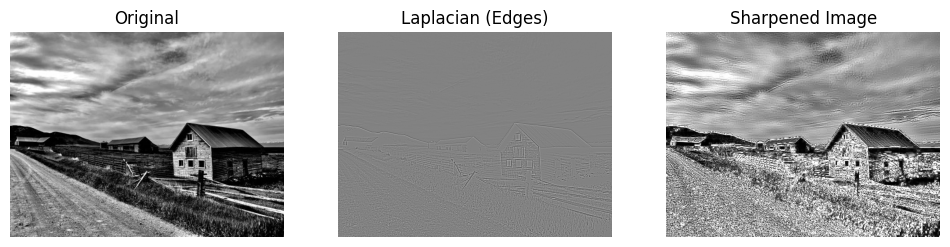

In [51]:
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)


sharpened = cv2.convertScaleAbs(img + laplacian)

# Display results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(laplacian, cmap='gray'), plt.title("Laplacian (Edges)"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(sharpened, cmap='gray'), plt.title("Sharpened Image"), plt.axis("off")
plt.show()

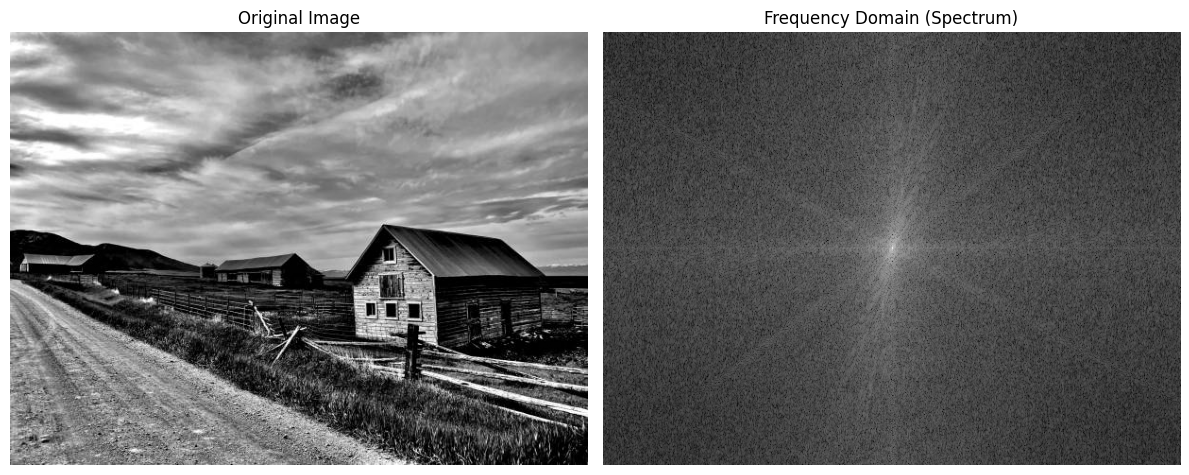

In [52]:
f_transform = fft2(np.float32(img) / 255.0)
f_shift = fftshift(f_transform)

magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Frequency Domain
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Frequency Domain (Spectrum)")
plt.axis("off")

plt.tight_layout()
plt.show()

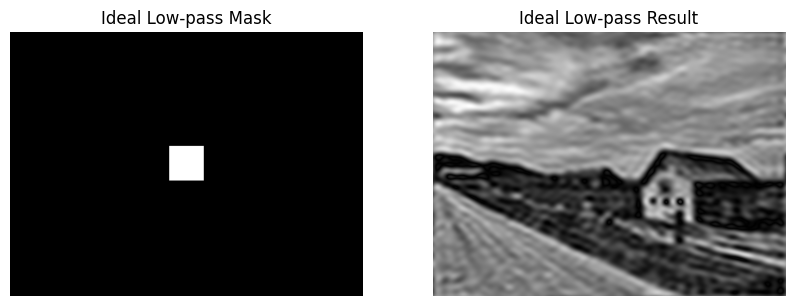

In [54]:
# Ideal Low-pass Filter
ideal_lp, mask_lp = apply_frequency_filter(image, 'ideal_lp', cutoff=30)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask_lp, cmap='gray')
plt.title('Ideal Low-pass Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ideal_lp, cmap='gray')
plt.title('Ideal Low-pass Result')
plt.axis('off')
plt.show()


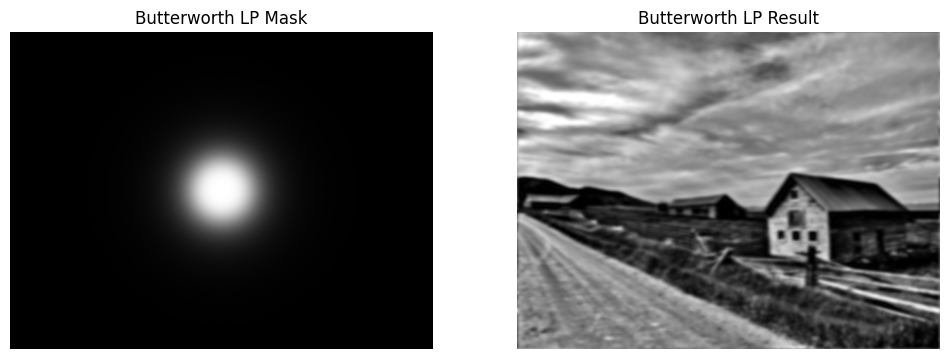

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworth_lowpass_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

cutoff = 50
order = 2
H = butterworth_lowpass_filter(img.shape, cutoff, order)


fshift = dft_shift * H
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

butter_lp_normalized = cv2.convertScaleAbs(img_back)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H, cmap='gray')
plt.title("Butterworth LP Mask")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(butter_lp_normalized, cmap='gray')
plt.title("Butterworth LP Result")
plt.axis("off")
plt.show()


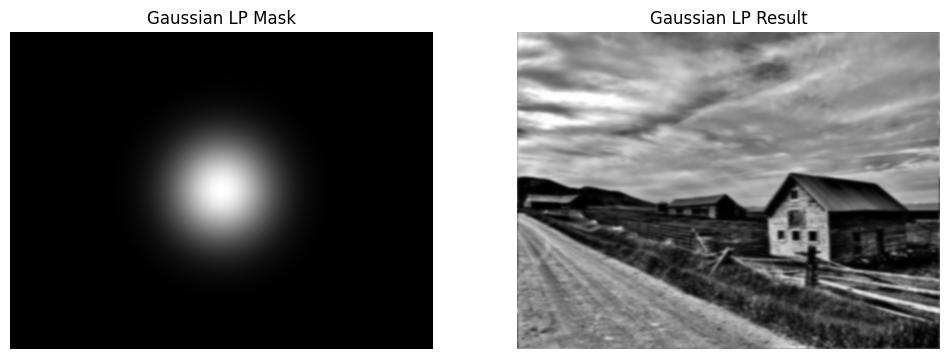

In [83]:
def gaussian_lowpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)


cutoff = 50
H = gaussian_lowpass_filter(img.shape, cutoff)

fshift = dft_shift * H
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

gauss_lp_normalized = cv2.convertScaleAbs(img_back)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H, cmap='gray')
plt.title("Gaussian LP Mask")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gauss_lp_normalized, cmap='gray')
plt.title("Gaussian LP Result")
plt.axis("off")
plt.show()

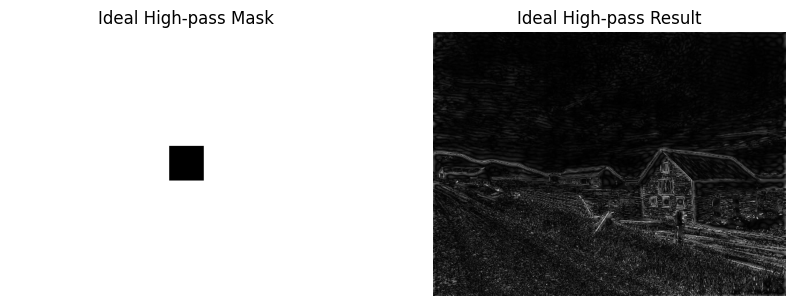

In [65]:
# Ideal High-pass Filter
ideal_hp, mask_hp = apply_frequency_filter(img, 'ideal_hp', cutoff=30)

# Normalize the filtered image for display
ideal_hp_normalized = cv2.normalize(ideal_hp, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask_hp, cmap='gray')
plt.title('Ideal High-pass Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ideal_hp_normalized, cmap='gray')
plt.title('Ideal High-pass Result')
plt.axis('off')
plt.show()

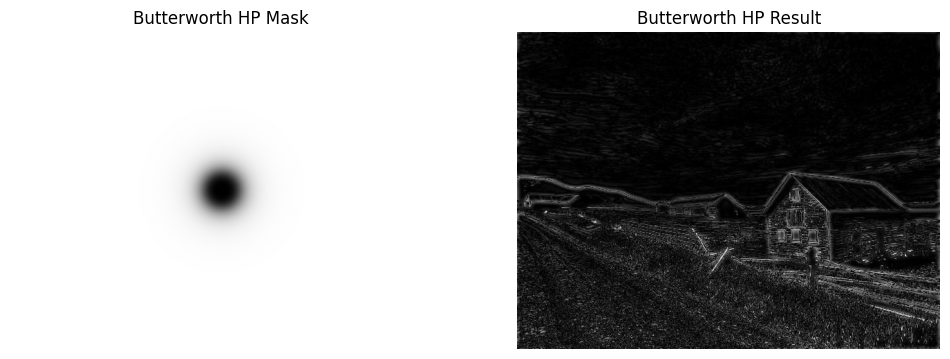

In [86]:
def butterworth_highpass_filter(shape, cutoff=30, order=2):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (cutoff / (D + 1e-5))**(2 * order))
    return H

dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

cutoff = 30
order = 2
H = butterworth_highpass_filter(img.shape, cutoff, order)

fshift = dft_shift * H
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

butter_hp_normalized = cv2.convertScaleAbs(img_back)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H, cmap='gray')
plt.title("Butterworth HP Mask")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(butter_hp_normalized, cmap='gray')
plt.title("Butterworth HP Result")
plt.axis("off")
plt.show()

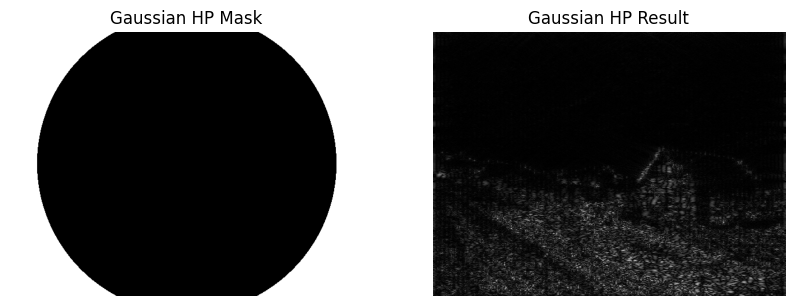

In [67]:
# Gaussian High-pass Filter
gauss_hp, mask_ghp = apply_frequency_filter(img, 'gaussian_hp', cutoff=30)

# Normalize the filtered image for display
gauss_hp_normalized = cv2.normalize(gauss_hp, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask_ghp, cmap='gray')
plt.title('Gaussian HP Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gauss_hp_normalized, cmap='gray')
plt.title('Gaussian HP Result')
plt.axis('off')
plt.show()

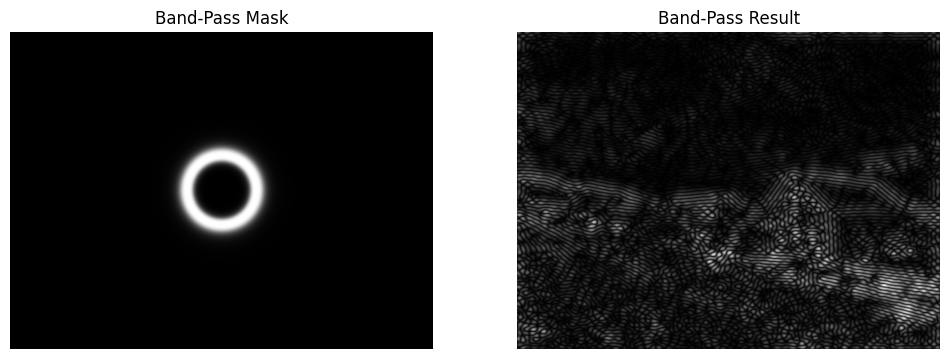

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def butterworth_bandpass_filter(shape, d0=30, w=15, order=2):
    """
    Band-pass filter = High-pass and Low-pass combined
    d0: center frequency
    w: bandwidth
    """
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2

    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)


    H = 1 / (1 + (((D**2 - d0**2) / (D * w + 1e-5))**(2*order)))
    return H


dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

d0 = 50
w = 20
order = 2
H = butterworth_bandpass_filter(img.shape, d0=d0, w=w, order=order)


fshift = dft_shift * H
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

bandpass_normalized = cv2.convertScaleAbs(img_back)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(H, cmap='gray')
plt.title("Band-Pass Mask")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bandpass_normalized, cmap='gray')
plt.title("Band-Pass Result")
plt.axis("off")
plt.show()
